In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [13]:
data = pd.read_csv('1penguins.csv')
data.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [15]:
cat_cols = ['species',	'island', 'sex']

In [28]:
df_dummies = pd.get_dummies(data, columns=cat_cols)

In [29]:
df_dummies.head()

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False


In [18]:
df_dummies.isna().sum()

index                0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_male             0
dtype: int64

In [30]:
df_clean = df_dummies.dropna()
df_clean.head()

,index,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True


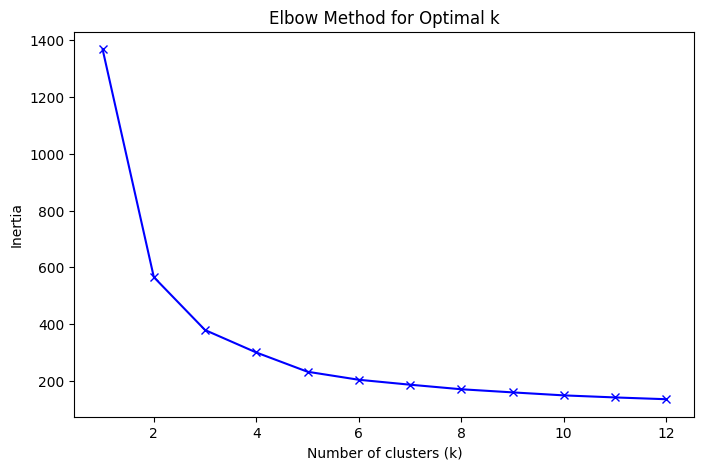

In [56]:

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = df_clean[features]

#  Scale 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# optimal number of clusters (Elbow method)
inertias = []
K = range(1, 13)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Explained variance:
PC1: 68.8%
PC2: 19.3%
Total (2 components): 88.2%
                     PC1    PC2
bill_length_mm     0.455  0.597
bill_depth_mm     -0.400  0.798
flipper_length_mm  0.576  0.002
body_mass_g        0.548  0.084


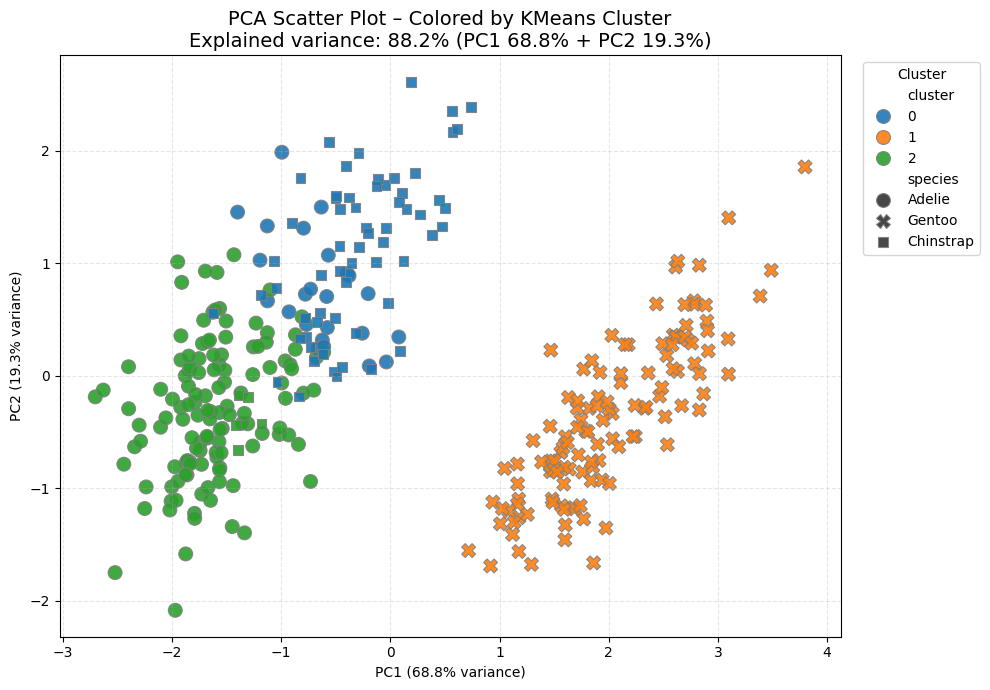

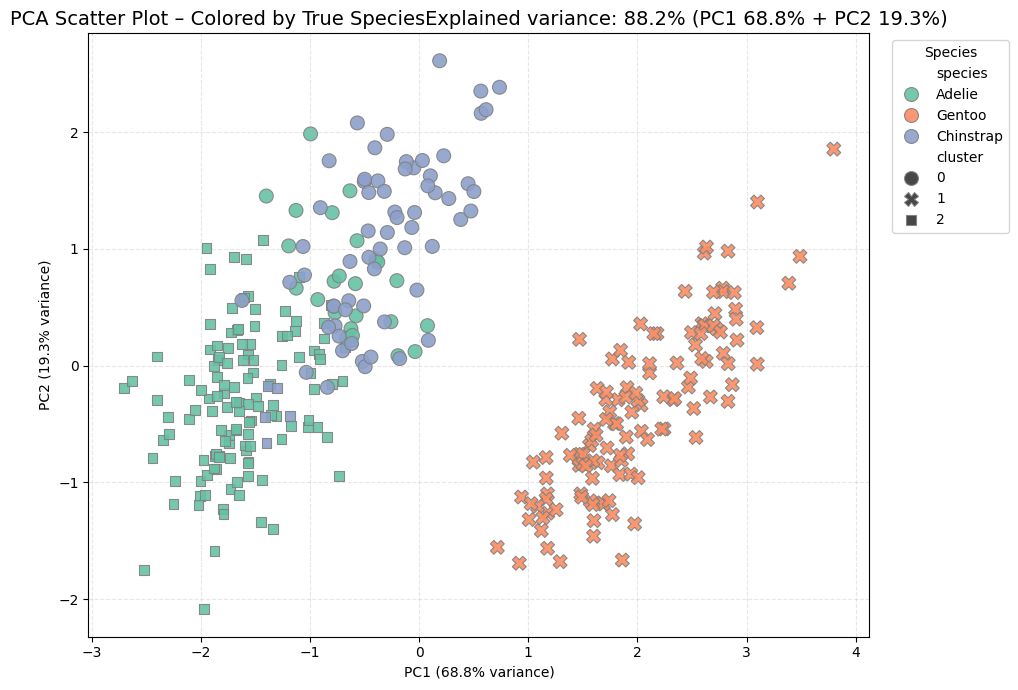

In [ ]:

# PCA on the same scaled features used for clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)         


pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2'],
    index=df_clean.index
)


pca_df['cluster'] = df_clean['cluster']


species_map = {
    (True, False, False): 'Adelie',
    (False, True, False): 'Chinstrap',
    (False, False, True): 'Gentoo'
}
pca_df['species'] = df_clean[['species_Adelie', 'species_Chinstrap', 'species_Gentoo']]\
    .apply(lambda row: species_map[tuple(row)], axis=1)

# Explained variance 
explained = pca.explained_variance_ratio_
print(f"Explained variance:")
print(f"PC1: {explained[0]:.1%}")
print(f"PC2: {explained[1]:.1%}")
print(f"Total (2 components): {explained.sum():.1%}")


loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
).round(3)

print(loadings)

# Plot 1: PCA colored by KMeans cluster 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='cluster',
    palette='tab10',
    style='species',          
    s=100,
    alpha=0.9,
    edgecolor='gray'
)

plt.title(
    f"PCA Scatter Plot – Colored by KMeans Cluster"
    f"Explained variance: {explained.sum():.1%} (PC1 {explained[0]:.1%} + PC2 {explained[1]:.1%})",
    fontsize=14
)
plt.xlabel(f"PC1 ({explained[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained[1]:.1%} variance)")
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 2: PCA colored by true species (validation) 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='species',
    palette='Set2',
    style='cluster',           
    s=100,
    alpha=0.9,
    edgecolor='gray'
)

plt.title(
    f"PCA Scatter Plot – Colored by True Species"
    f"Explained variance: {explained.sum():.1%} (PC1 {explained[0]:.1%} + PC2 {explained[1]:.1%})",
    fontsize=14
)
plt.xlabel(f"PC1 ({explained[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained[1]:.1%} variance)")
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='Species', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [50]:
# Fit with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


pd.crosstab(df_clean['cluster'], df_clean['species_Adelie'], 
                  colnames=['Adelie'], margins=True)


Adelie,False,True,All
cluster,,,
0,63,24,87
1,123,0,123
2,5,127,132
All,191,151,342


In [48]:

numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


cluster_stats = df_clean.groupby('cluster')[numeric_cols].mean().round(2)


cluster_stats['count'] = df_clean.groupby('cluster').size()


cluster_stats['percentage'] = (cluster_stats['count'] / len(df_clean) * 100).round(1)


species_cols = ['species_Adelie', 'species_Chinstrap', 'species_Gentoo']

def get_dominant_species(group):
    if len(group) == 0:
        return '—'
    
    counts = group[species_cols].sum()
    dominant = counts.idxmax().replace('species_', '')
    return dominant

cluster_stats['dominant_species'] = df_clean.groupby('cluster').apply(get_dominant_species)

cluster_stats['pct_male'] = (
    df_clean.groupby('cluster')['sex_male']
    .mean()
    .mul(100)
    .round(1)
)



display(cluster_stats)
cluster_stats.to_csv('cluster_stats.csv')

C:\Users\Cyan\AppData\Local\Temp\ipykernel_12500\489012793.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_stats['dominant_species'] = df_clean.groupby('cluster').apply(get_dominant_species)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,count,percentage,dominant_species,pct_male
cluster,,,,,,,,
0,47.53,18.76,196.90,3902.01,87,25.4,Chinstrap,65.5
1,47.50,14.98,217.19,5076.02,123,36.0,Gentoo,49.6
2,38.21,18.11,188.40,3584.66,132,38.6,Adelie,37.9


Dataset – Palmer Penguins

Real biological dataset collected by researchers in Antarctica
344 penguins
Columns used:
species (Adelie, Chinstrap, Gentoo) ← this is the true label (you don't use it for training)
island (Biscoe, Dream, Torgersen)

bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g ← the main physical measurements

sex (male/female)
year (2007–2009)

Famous dataset because it's clean-ish, small, interpretable, and shows nice separation between species when visualized properly.

Step-by-step: (the full project flow)

Load the data

pd.read_csv('1penguins.csv')

→ You get 344 rows × 9 columns
Understand the data

data.info() → see types + missing values

→ 2 penguins missing all measurements
→ 11 penguins missing sex

Handle missing values (your current approach)

df_dummies = pd.get_dummies(...)

df_clean = df_dummies.dropna()

→ You remove the ~11 rows with any missing value → left with 333 complete penguins

→ This is acceptable because missingness is low (~3%)

Prepare features for clustering

One-hot encode categorical columns: species, island, sex

But for actual clustering you only use the 4 numeric measurements:

bill_length, bill_depth, flipper_length, body_mass

Scale the features (very important step)

StandardScaler() → makes all four measurements have similar influence

Without this → body_mass would dominate because it's in grams (thousands) while bill lengths are ~40 mm

Apply K-Means clustering (unsupervised learning)

KMeans(n_clusters=3, ...)

→ You ask the algorithm to find 3 groups (because we suspect there are 3 species)

→ Each penguin gets assigned a cluster number: 0, 1, or 2

Interpret the clusters (this is usually the main learning goal)

You create a summary table per cluster:Pythoncluster_stats = df_clean.groupby('cluster')[numeric_cols].mean().round(2)

cluster_stats['count'] = df_clean.groupby('cluster').size()Typical result looks something like 
this:Clusterbill_lengthbill_depthflipperbody_masscountInterpretation (after looking)0~38–40 mm~18–19 mm~189–192 mm~3600–3800 g~140–150Mostly small Adelie penguins1~48–50 mm~15–16 mm~215–230 mm~4800–5500 g~110–130Large Gentoo penguins2~49–52 mm~17–19 mm~195–205 mm~3600–4000 g~60–80Chinstrap penguins→ The clusters usually match the species very well (often >95% accuracy even though species label was never used!)
(Common next steps – not yet in your notebook)

Elbow plot to justify why k=3 is reasonable

Scatter plots: bill_length vs flipper_length colored by cluster

Crosstab: cluster vs actual species → calculate how “pure” the clusters are

Silhouette score or other clustering quality metrics

Discussion: “K-Means rediscovered the penguin species almost perfectly using only measurements”


What is the educational point of this project?

Learn the full data analysis workflow: load → clean → explore → preprocess → model → interpret

Understand unsupervised learning (no correct answers given → we look for patterns)

See why feature scaling matters so dramatically in distance-based algorithms

Experience how clustering can recover real-world groups (here: biological species)

Practice pandas grouping, one-hot encoding, visualization, and model interpretation

Typical report / presentation titles for this exact project

"Clustering Palmer Penguins: Can K-Means Discover Species Without Labels?"

"Unsupervised Classification of Antarctic Penguins"

"Exploratory Data Analysis and Clustering on the Palmer Penguins Dataset"

"K-Means Clustering to Identify Penguin Species"